In [1]:
import numpy as np
from pyscf import gto, scf, dft

from pyscf.tools.dump_mat import dump_rec
from sys import stdout

from sys import path
path.append("..")

from pop_scheme import FrgPopulationScheme, FrgMullikenPopulation
from rdft       import Constraints, rdft

mol = gto.Mole()
mol.verbose = 0
mol.atom = '''
O  -1.551007  -0.114520   0.000000
H  -1.934259   0.762503   0.000000
H  -0.599677   0.040712   0.000000
O   1.350625   0.111469   0.000000
H   1.680398  -0.373741  -0.758561
H   1.680398  -0.373741   0.758561
'''

mol.basis = '6-31g(d)'
mol.cart  = True
mol.spin   = 0
mol.charge = 0
mol.build()

In [2]:
kk = 40
pop1_list    = np.zeros(kk)
e_add1_list  = np.zeros(kk)
etot_1_list  = np.zeros(kk)
lams_1_list  = np.zeros(kk)
omega_list   = np.linspace(0,100.0,kk)

mf           = scf.RHF(mol)
mf.conv_tol  = 1e-9
mf.verbose   = 0
mf.max_cycle = 100
mf.kernel()
dm = mf.make_rdm1()
etot_0 = mf.e_tot
pop = mf.mulliken_pop(verbose=0)[1]
pop0 = pop[0] + pop[1] + pop[2]

old_get_fock       = mf.get_fock
old_energy_elec    = mf.energy_elec

frg_list            = [[0,1,2],[3,4,5]]
nelec_required_list = [[9.0], [11.0]]
    
for iomega, omega in enumerate(omega_list):
    mf           = scf.RHF(mol)
    mf.conv_tol  = 1e-9
    mf.verbose   = 0
    mf.max_cycle = 100
    mf.kernel()
    dm = mf.make_rdm1()

    omega_vals          = [[omega],[0.0]]
    e_add               = rdft(mf, frg_list, nelec_required_list, omega_vals, dm0=dm, verbose=3, maxiter=500, tol=1e-9,
                              old_energy_elec=old_energy_elec, old_get_fock=old_get_fock)
    pop                 = mf.mulliken_pop(verbose=0)[1]
    pop1                = pop[0]+pop[1]+pop[2]
    pop1_list[iomega]   = pop1
    e_add1_list[iomega] = e_add
    etot_1_list[iomega] = mf.e_tot - etot_0
    lams_1_list[iomega] = omega*(1-pop1)

    print("omega = {: 12.6f}, e_tot-e_tot0 = {: 12.6f}, e_add = {: 12.6f}, pop = {: 12.6f}, lambda = {: 12.6f}".format(
        omega, mf.e_tot - etot_0, e_add, pop1, omega*(1-pop1)
    ))
    print("")

cycle= 1 E= -152.029828966588  delta_E= -7.39e-13  |g|= 5.3e-07  |ddm|= 1.85e-06
converged SCF energy = -152.029828966588
omega =     0.000000, e_tot-e_tot0 =    -0.000000, e_add =     0.000000, pop =    -0.028196, lambda =     0.000000

cycle= 1 E= -132.027540554168  delta_E= 18.6  |g|= 2.55  |ddm|=   13
cycle= 2 E= -10.6593445225252  delta_E=  121  |g|=    5  |ddm|= 15.3
cycle= 3 E= -44.6210881825799  delta_E=  -34  |g|= 6.17  |ddm|= 11.4
cycle= 4 E= -4.09142183858178  delta_E= 40.5  |g|= 6.82  |ddm|= 11.1
cycle= 5 E= -44.4682579979352  delta_E= -40.4  |g|=  6.2  |ddm|=   11
cycle= 6 E= -4.08562667075132  delta_E= 40.4  |g|= 6.82  |ddm|=   11
cycle= 7 E= -44.4675306512665  delta_E= -40.4  |g|=  6.2  |ddm|=   11
cycle= 8 E= -4.08559378140599  delta_E= 40.4  |g|= 6.82  |ddm|=   11


Overwritten attributes  get_fock energy_elec  of <class 'pyscf.scf.hf.RHF'>


cycle= 9 E= -44.4675255295567  delta_E= -40.4  |g|=  6.2  |ddm|=   11
cycle= 10 E= -109.078785199688  delta_E= -64.6  |g|=  4.4  |ddm|=   11
cycle= 11 E= -149.678387358004  delta_E= -40.6  |g|= 1.88  |ddm|=  7.3
cycle= 12 E= -150.886232621279  delta_E= -1.21  |g|= 0.909  |ddm|= 1.89
cycle= 13 E= -151.099321412495  delta_E= -0.213  |g|= 0.573  |ddm|= 0.743
cycle= 14 E= -148.170880386343  delta_E= 2.93  |g|= 1.76  |ddm|= 9.16
cycle= 15 E= -151.002641809599  delta_E= -2.83  |g|= 0.534  |ddm|= 9.28
cycle= 16 E= -151.016849105048  delta_E= -0.0142  |g|= 0.474  |ddm|= 0.118
cycle= 17 E= -151.07411877312  delta_E= -0.0573  |g|= 0.361  |ddm|= 0.248
cycle= 18 E= -151.114641164839  delta_E= -0.0405  |g|= 0.333  |ddm|= 0.189
cycle= 19 E= -148.406348655493  delta_E= 2.71  |g|=  1.6  |ddm|= 8.83
cycle= 20 E= -151.052161182498  delta_E= -2.65  |g|= 0.366  |ddm|= 8.86
cycle= 21 E= -151.05540769744  delta_E= -0.00325  |g|= 0.36  |ddm|= 0.0179
cycle= 22 E= -151.048154903774  delta_E= 0.00725  |g|= 0.37

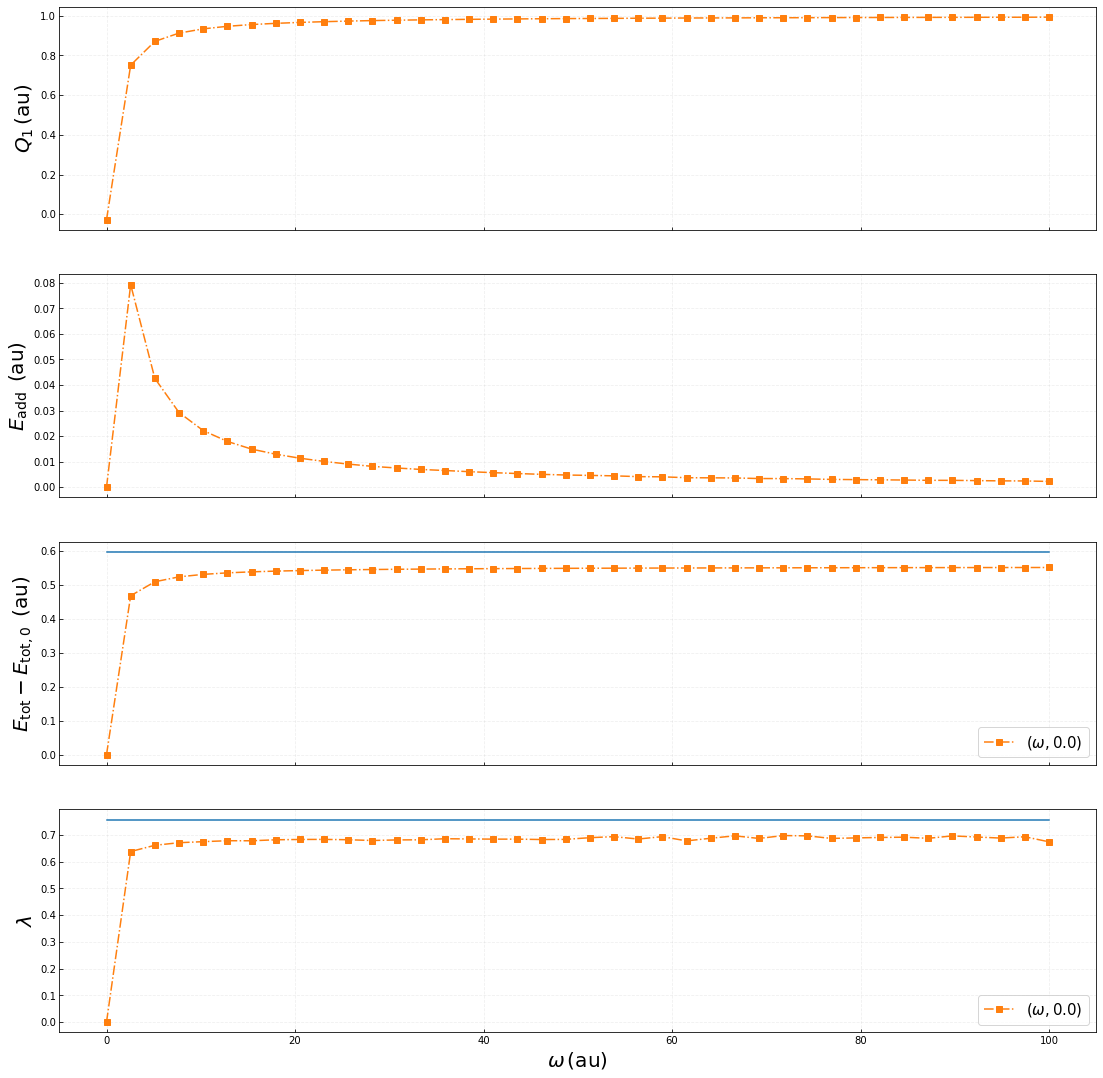

In [5]:
import matplotlib as mpl
from   matplotlib import pyplot as plt

style_dict = {
    '1': dict(linestyle='-.',  marker='s', color='C1',  markersize=6, markevery=1, label=r"$(\omega, 0.0)$"),
    '2': dict(linestyle='-.',  marker='*', color='C2',  markersize=10, markevery=1, label=r"$(2\omega, 0.0)$"),
    '3': dict(linestyle='-.',  marker='o', color='C3',  markersize=6, markevery=1, label=r"$(\omega, \omega)$")
}

params = {
        "axes.titlesize":  10, 
        "axes.labelsize":  20, 
        "legend.fontsize": 15,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10, 
        "xtick.direction":'in', 
        "ytick.direction":'in' 
}
mpl.rcParams.update(**params)

k        = kk
tmp_list1 = [ 0.5965663711999982 for _ in range(k)]
tmp_list2 = [ 0.7572879261889914 for _ in range(k)]
fig1, ax1 = plt.subplots(4,1,figsize=(16,16),sharex=True)
fig1.subplots_adjust(left=0.09, bottom=0.1, right=0.99, top=0.99, wspace=0.1)

ax1[0].plot(omega_list[:k], pop1_list[:k],              **style_dict['1'])
ax1[1].plot(omega_list[:k], e_add1_list[:k],            **style_dict['1'])
ax1[2].plot(omega_list[:k], etot_1_list[:k],            **style_dict['1'])
ax1[2].plot(omega_list[:k], tmp_list1)
ax1[3].plot(omega_list[:k], lams_1_list[:k],            **style_dict['1'])
ax1[3].plot(omega_list[:k], tmp_list2)

props = {'ylabel':r'$Q_1\,$(au)'}
ax1[0].grid(linestyle="--", alpha=0.2)
ax1[0].set(**props)

props = {'ylabel':r'$E_\mathrm{add}\,$ (au)'}
ax1[1].grid(linestyle="--", alpha=0.2)
ax1[1].set(**props)

props = {'ylabel':r'$E_\mathrm{tot}-E_\mathrm{tot,0}\,$ (au)'}
ax1[2].legend(loc='lower right')
ax1[2].grid(linestyle="--", alpha=0.2)
ax1[2].set(**props)

props = {'ylabel':r'$\lambda$', 'xlabel':r'$\omega\,$(au)'}
ax1[3].legend(loc='lower right')
ax1[3].grid(linestyle="--", alpha=0.2)
ax1[3].set(**props);

In [4]:
-151.961472701 + 152.0298289652

0.06835626420001972

In [6]:
pop0

-0.028196306043014152